In [1]:
# newer version of tensorflow might not need this
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warnings

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub


print("NP version:", np.__version__)
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

2024-01-20 02:51:56.490277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 02:51:56.490320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 02:51:56.516833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NP version: 1.26.2
TF version: 2.15.0
Hub version: 0.15.0
GPU available (YESS!!!!)


In [2]:
# Load in the data

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## This is a binary classification problem

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
# spliting data

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [30]:
row, column_features = X_train.shape
row, column_features

(455, 30)

In [31]:
# Scaling the data. Converting values to a common scale
# Improves performance for the ML algorithm and coverage faster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# .fit_transform() use for training dataset
X_train = scaler.fit_transform(X_train) 
# transform use for test dataset. Scaling would automatically apply by learning from .fit_transform()
X_test = scaler.transform(X_test) 


In [36]:
# creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(column_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 0.8291 - accuracy: 0.4527 - val_loss: 0.8940 - val_accuracy: 0.4649
Epoch 2/100


I0000 00:00:1705720744.208092    1040 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 [==============================] - 0s 7ms/step - loss: 0.7296 - accuracy: 0.5516 - val_loss: 0.7919 - val_accuracy: 0.5263
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6330 - val_loss: 0.7057 - val_accuracy: 0.6228
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5783 - accuracy: 0.6989 - val_loss: 0.6345 - val_accuracy: 0.6754
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5247 - accuracy: 0.7363 - val_loss: 0.5741 - val_accuracy: 0.6842
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4796 - accuracy: 0.7670 - val_loss: 0.5240 - val_accuracy: 0.7281
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4431 - accuracy: 0.8000 - val_loss: 0.4831 - val_accuracy: 0.7719
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.8286 - val_loss: 0.4483 - val_accuracy: 0.7982
Epoch 9/100
15/15 [======

In [38]:

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

15/15 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9736
Train score: [0.09509225934743881, 0.9736263751983643]
4/4 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9825
Test score: [0.07954376935958862, 0.9824561476707458]


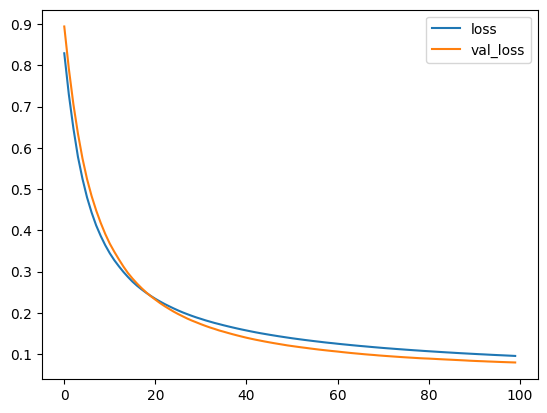

In [41]:
plt.plot(train_model.history['loss'], label='loss') # measure how well the model is peforming on training dataset
plt.plot(train_model.history['val_loss'], label='val_loss') # validation loss perform on data if never seen
plt.legend()

# Why are both loss vs val_loss important?

`loss`
- loss refers to the value of the loss function for the training data. It's a measure of how well the model is performing on the training dataset.
- Usage: It's used by the optimization algorithm (like gradient descent) to adjust the model's parameters (weights and biases) with the goal of minimizing this loss.


- **Detecting Overfitting**: If **`loss`** decreases (which is good) but **`val_loss`** starts to increase, it's a sign that the model is starting to memorize the training data (overfitting) rather than learning to generalize from it.

- **Model Tuning**: By monitoring both **`loss`** and **`val_loss`**, you can make decisions about when to stop training, which model parameters are optimal, and if any adjustments need to be made to prevent overfitting (like adding dropout, regularization, or getting more data).

In summary, **`loss`** measures how well the model is learning from the training data, while **`val_loss`** measures how well the model's learning generalizes to new, unseen data. Keeping an eye on both helps in developing a model that not only learns well but also performs well in practical, real-world use.

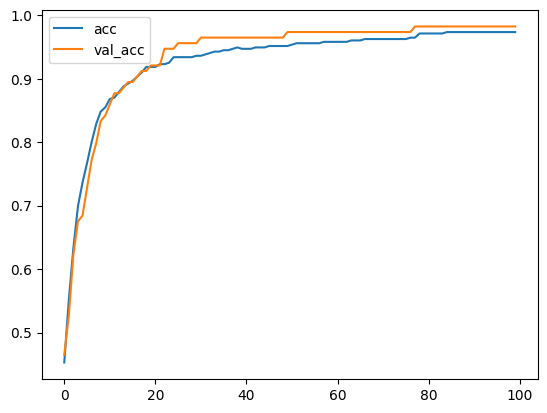

In [43]:
plt.plot(train_model.history['accuracy'], label='acc')
plt.plot(train_model.history['val_accuracy'], label='val_acc')
plt.legend()

# Why are both accuracy vs val_accuracy important?

`accuracy`
- accuracy refers to the proportion of correct predictions that the model makes when evaluated on the training dataset.

- Usage: It's used to understand how well the model is learning and performing on the data it was trained on.

- **Monitoring Overfitting**: If **`accuracy`** is high but **`val_accuracy`** is significantly lower, it might be a sign that the model is overfitting to the training data, meaning it's learning the training data too well but not generalizing to new data.

- **Tuning the Model**: By observing both **`accuracy`** and **`val_accuracy`**, you can make informed decisions about when to stop training, adjust learning rates, add dropout or regularization, or even collect more data to improve the model's performance.

In summary, while **`accuracy`** gives you a measure of how well the model is learning the training data, **`val_accuracy`** tells you how well the model's learning is generalizing to new, unseen data. Balancing these two metrics is key to developing a robust, well-performing model.

In [52]:
# Make prediction
predict = model.predict(X_test)
print(predict[:10])

4/4 [==============================] - 0s 2ms/step
[[8.2486123e-01]
 [2.1454450e-03]
 [5.2556187e-02]
 [9.8392498e-01]
 [9.9442720e-01]
 [3.7286230e-07]
 [1.0228425e-05]
 [8.7350495e-02]
 [4.4792259e-01]
 [9.8758554e-01]]


In [55]:
# Round to ge the actual predictions
predict = np.round(predict).flatten()
print(predict)
print(predict.shape)

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
(114,)


In [54]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(predict == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9824561403508771
4/4 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9825
Evaluate output: [0.07954376935958862, 0.9824561476707458]


# Saving the model

In [57]:
model.save('linearclassifier.keras')

In [58]:
!ls -lh

total 116K
-rw-r--r-- 1 root root 95K Jan 20 06:00 linear-classification.ipynb
-rw-r--r-- 1 root root 17K Jan 20 06:14 linearclassifier.keras


In [59]:
load_model = tf.keras.models.load_model('linearclassifier.keras')
print(load_model.layers)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0795 - accuracy: 0.9825


[0.07954376935958862, 0.9824561476707458]